In [68]:
import os
import glob
import json
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import requests
import seaborn as sns


In [69]:
workdir = os.path.dirname(os.getcwd())
plot_dir = Path(f"{workdir}/9_drug_protein_moa/data/plot")
module_path = Path("/home/bbc8731/HSV/3_module_expansion/data/categories_methods")


In [70]:
files = sorted(p for p in module_path.glob("*/") if p.name.startswith(("BP_", "CC_")))

for p in files:
    candidate_drugs = pd.read_csv(f"{p}/drug_repurposing/trustrank/uniprot_ppi/validation/approved_drugs/candidate_drugs_scored_atc_code.csv")
    candidate_drugs = candidate_drugs.rename(columns={"score": "drug_score", 
                                                      "neg_log_score": "drug_neg_log_score", 
                                                      "cmpdname": "drug_name", 
                                                      "atc_code":"drug_atc_code",
                                                     "atc_label": "drug_atc_label"})  

df = candidate_drugs

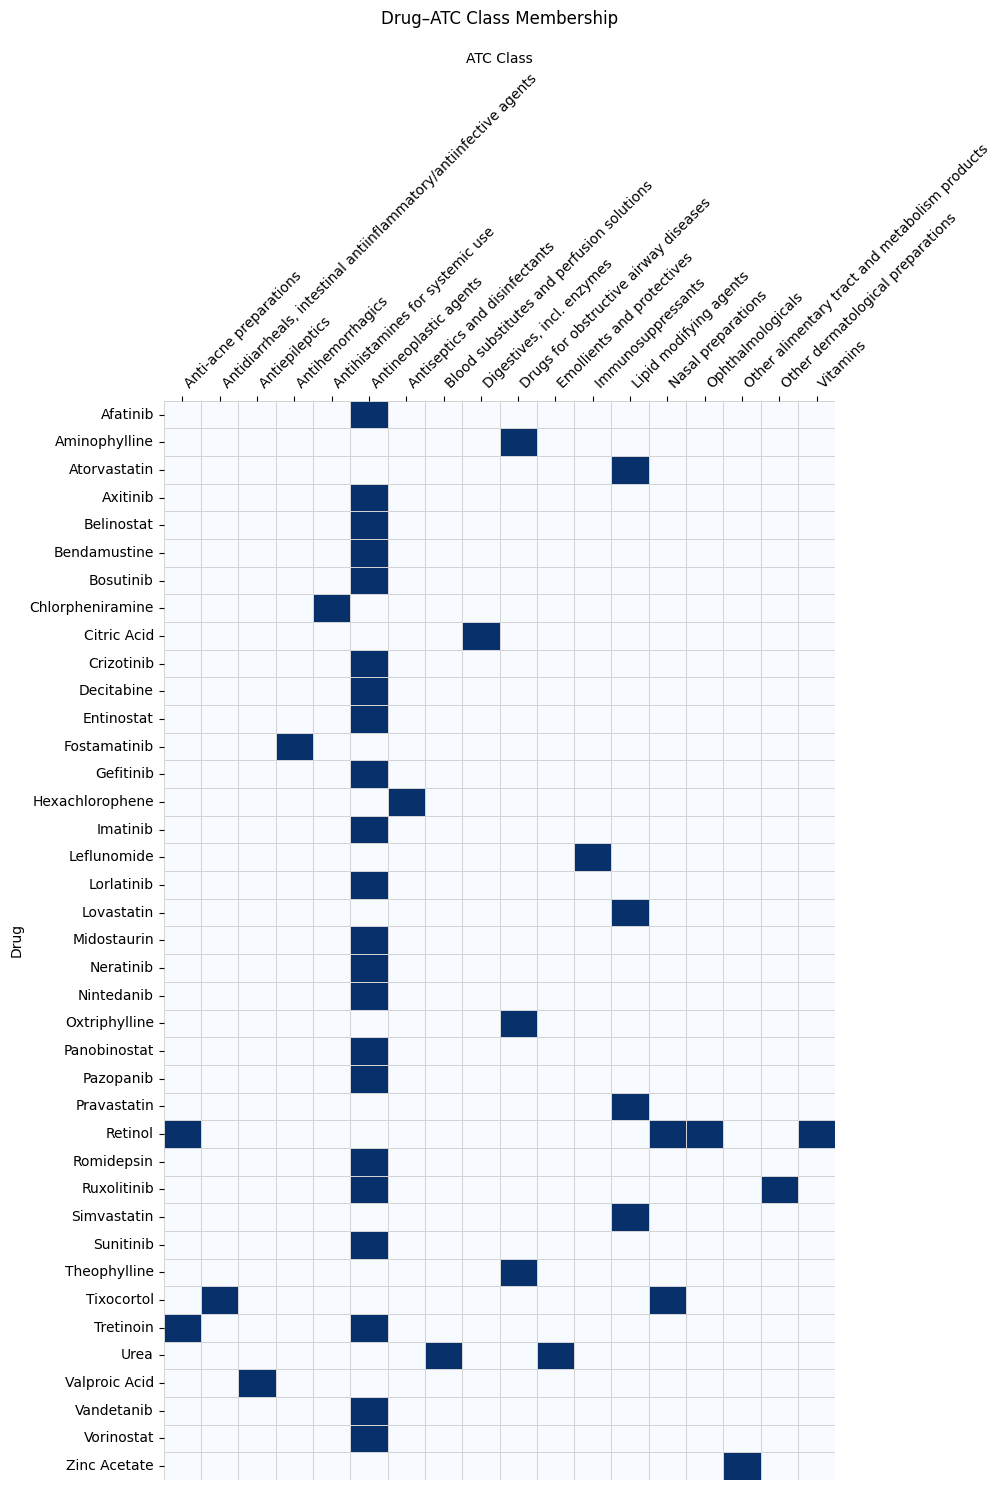

In [71]:
# --- Create binary matrix (drug x ATC) ---
pivot = (
    df.assign(value=1)
      .pivot_table(index="drug_name",
                   columns="drug_atc_label",
                   values="value",
                   aggfunc="max",
                   fill_value=0)
)

# Optional: sort drugs alphabetically
pivot = pivot.sort_index()

# Optional: sort ATC columns alphabetically
pivot = pivot.reindex(sorted(pivot.columns), axis=1)

# --- Plot ---
plt.figure(figsize=(10, 15))
ax = sns.heatmap(
    pivot,
    cmap="Blues",
    linewidths=0.5,
    linecolor="lightgray",
    cbar=False
)

# --- Move ATC labels to top and rotate 45° ---
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=45, ha="left")

plt.xlabel("ATC Class")
plt.ylabel("Drug")
plt.title("Drug–ATC Class Membership", pad=20)

plt.tight_layout()
plt.show()

# plt.savefig(os.path.join(plot_dir, "drug_atc_heatmap.pdf"), bbox_inches="tight")
# plt.close()


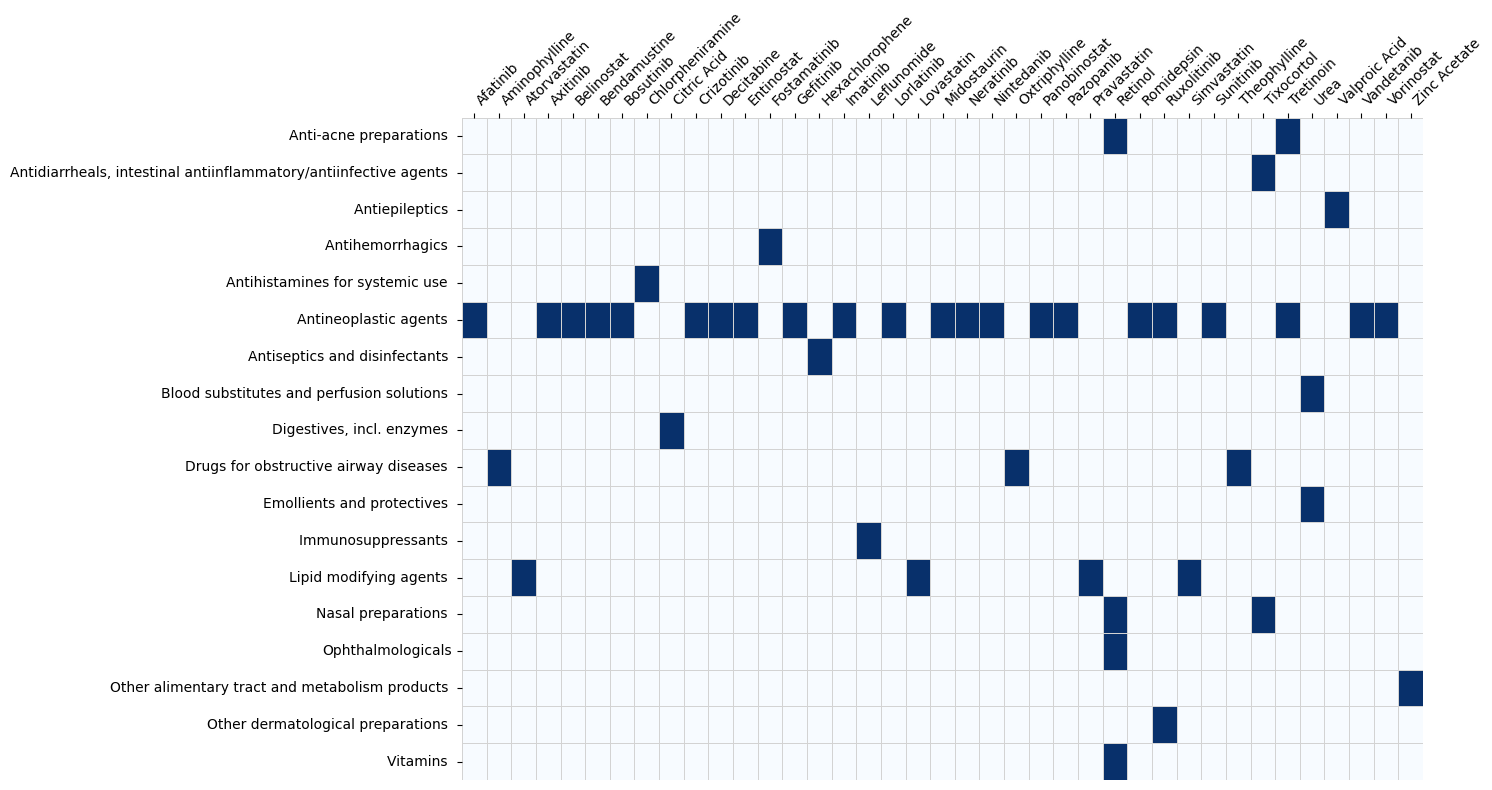

In [72]:
# --- Create binary matrix (ATC x drug) ---
pivot = (
    df.assign(value=1)
      .pivot_table(index="drug_name",
                   columns="drug_atc_label",
                   values="value",
                   aggfunc="max",
                   fill_value=0)
)

# Optional: sort drugs alphabetically
pivot = pivot.sort_index()

# Optional: sort ATC columns alphabetically
pivot = pivot.reindex(sorted(pivot.columns), axis=1)


# --- Transpose so drugs are columns and ATC are rows ---
pivot_T = pivot.T

plt.figure(figsize=(15, 8))
ax = sns.heatmap(
    pivot_T,
    cmap="Blues",
    linewidths=0.5,
    linecolor="lightgray",
    cbar=False
)

# --- Put drug names on top and rotate ---
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=45, ha="left")

plt.xlabel("")
plt.ylabel("")
plt.title("", pad=20)

plt.tight_layout()

plt.show()
# plt.savefig(os.path.join(plot_dir, "drug_atc_heatmap.pdf"), bbox_inches="tight")
